<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/Linear%20Regression%20Housing%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
housing = pd.read_csv(r"/content/Housing.csv")
housing.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [93]:
housing.shape

(545, 13)

In [94]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [95]:
housing = housing.replace(to_replace = ['yes','no'],value = ['1','0'])
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [96]:
import pandas as pd

# Sample data
data = {
    'furnishingstatus': ['furnished', 'semi-furnished', 'unfurnished']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding
status = pd.get_dummies(df, columns=['furnishingstatus'],drop_first=True)

# Print the encoded DataFrame
print(status)


   furnishingstatus_semi-furnished  furnishingstatus_unfurnished
0                                0                             0
1                                1                             0
2                                0                             1


In [97]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [98]:
housing=pd.concat([housing, status], axis=1)
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0.0,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,NaN,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,NaN,NaN
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,NaN,NaN
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,NaN,NaN
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,NaN,NaN


In [99]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [100]:
housing['areaperbedroom']

0      1855.000000
1      2240.000000
2      3320.000000
3      1875.000000
4      1855.000000
          ...     
540    1500.000000
541     800.000000
542    1810.000000
543     970.000000
544    1283.333333
Name: areaperbedroom, Length: 545, dtype: float64

In [101]:
housing['bbratio']

0      0.500000
1      1.000000
2      0.666667
3      0.500000
4      0.250000
         ...   
540    0.500000
541    0.333333
542    0.500000
543    0.333333
544    0.333333
Name: bbratio, Length: 545, dtype: float64

In [102]:
housing.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3        1         0        0   
1    12250000  8960         4          4        4        1         0        0   
2    12250000  9960         3          2        2        1         0        1   
3    12215000  7500         4          2        2        1         0        1   
4    11410000  7420         4          1        2        1         1        1   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1        1         0        1   
541   1767150  2400         3          1        1        0         0        0   
542   1750000  3620         2          1        1        1         0        0   
543   1750000  2910         3          1        1        0         0        0   
544   1750000  3850         3          1        2        1         0        0  

In [103]:
def normalize (x):
  if x.dtype in [int, float]:
    normal_x = (x-min(x))/(max(x) - min(x))
    return normal_x
  else:
    return x


In [104]:
housing = housing.apply(normalize)

In [105]:
print(housing)

        price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0    1.000000  0.396564       0.6   0.333333  0.666667        1         0   
1    0.909091  0.502405       0.6   1.000000  1.000000        1         0   
2    0.909091  0.571134       0.4   0.333333  0.333333        1         0   
3    0.906061  0.402062       0.6   0.333333  0.333333        1         0   
4    0.836364  0.396564       0.6   0.000000  0.333333        1         1   
..        ...       ...       ...        ...       ...      ...       ...   
540  0.006061  0.092784       0.2   0.000000  0.000000        1         0   
541  0.001485  0.051546       0.4   0.000000  0.000000        0         0   
542  0.000000  0.135395       0.2   0.000000  0.000000        1         0   
543  0.000000  0.086598       0.4   0.000000  0.000000        0         0   
544  0.000000  0.151203       0.4   0.000000  0.333333        1         0   

    basement hotwaterheating airconditioning   parking prefarea  \
0       

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing, housing['price'], test_size=0.2, random_state=100)



In [107]:
X_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,areaperbedroom,bbratio
22,0.596970,0.439863,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished,NaN,NaN,0.370210,0.2
41,0.527273,0.323711,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished,NaN,NaN,0.279627,0.6
91,0.404242,0.350515,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished,NaN,NaN,0.481428,0.4
118,0.363636,0.327835,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished,NaN,NaN,0.282843,0.2
472,0.109091,0.136082,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished,NaN,NaN,0.084660,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.105155,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,unfurnished,NaN,NaN,0.194404,0.4
53,0.484848,0.240550,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0,semi-furnished,NaN,NaN,0.214772,0.6
350,0.175758,0.121649,0.2,0.000000,0.333333,1,0,0,1,0,0.333333,0,semi-furnished,NaN,NaN,0.213700,0.4
79,0.424242,0.298969,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0,furnished,NaN,NaN,0.260331,0.6


In [108]:
X_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,areaperbedroom,bbratio
265,0.229697,0.084536,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,1,semi-furnished,NaN,NaN,0.093102,0.2
54,0.484848,0.298969,0.4,0.333333,0.333333,1,1,0,0,1,0.333333,0,semi-furnished,NaN,NaN,0.260331,0.6
171,0.303030,0.592371,0.4,0.000000,0.000000,1,0,0,0,0,0.333333,1,semi-furnished,NaN,NaN,0.489146,0.2
244,0.242424,0.252234,0.4,0.000000,0.333333,1,1,1,0,0,0.000000,1,semi-furnished,NaN,NaN,0.223884,0.2
268,0.227879,0.226804,0.6,0.000000,0.333333,1,0,0,0,1,0.000000,0,semi-furnished,NaN,NaN,0.137723,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.121212,0.350515,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,semi-furnished,NaN,NaN,0.481428,0.4
320,0.200000,0.183505,0.4,0.000000,0.333333,1,0,0,0,0,0.666667,1,furnished,NaN,NaN,0.170285,0.2
424,0.139394,0.099656,0.4,0.000000,0.333333,0,0,1,0,0,0.000000,0,semi-furnished,NaN,NaN,0.104894,0.2
338,0.184848,0.146392,0.2,0.000000,0.333333,1,1,1,0,0,0.000000,0,semi-furnished,NaN,NaN,0.242644,0.4


In [109]:
y_train

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 436, dtype: float64

In [110]:
y_test

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
         ...   
451    0.121212
320    0.200000
424    0.139394
338    0.184848
373    0.163636
Name: price, Length: 109, dtype: float64

<ipython-input-111-18e76a7a6d3b>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr()


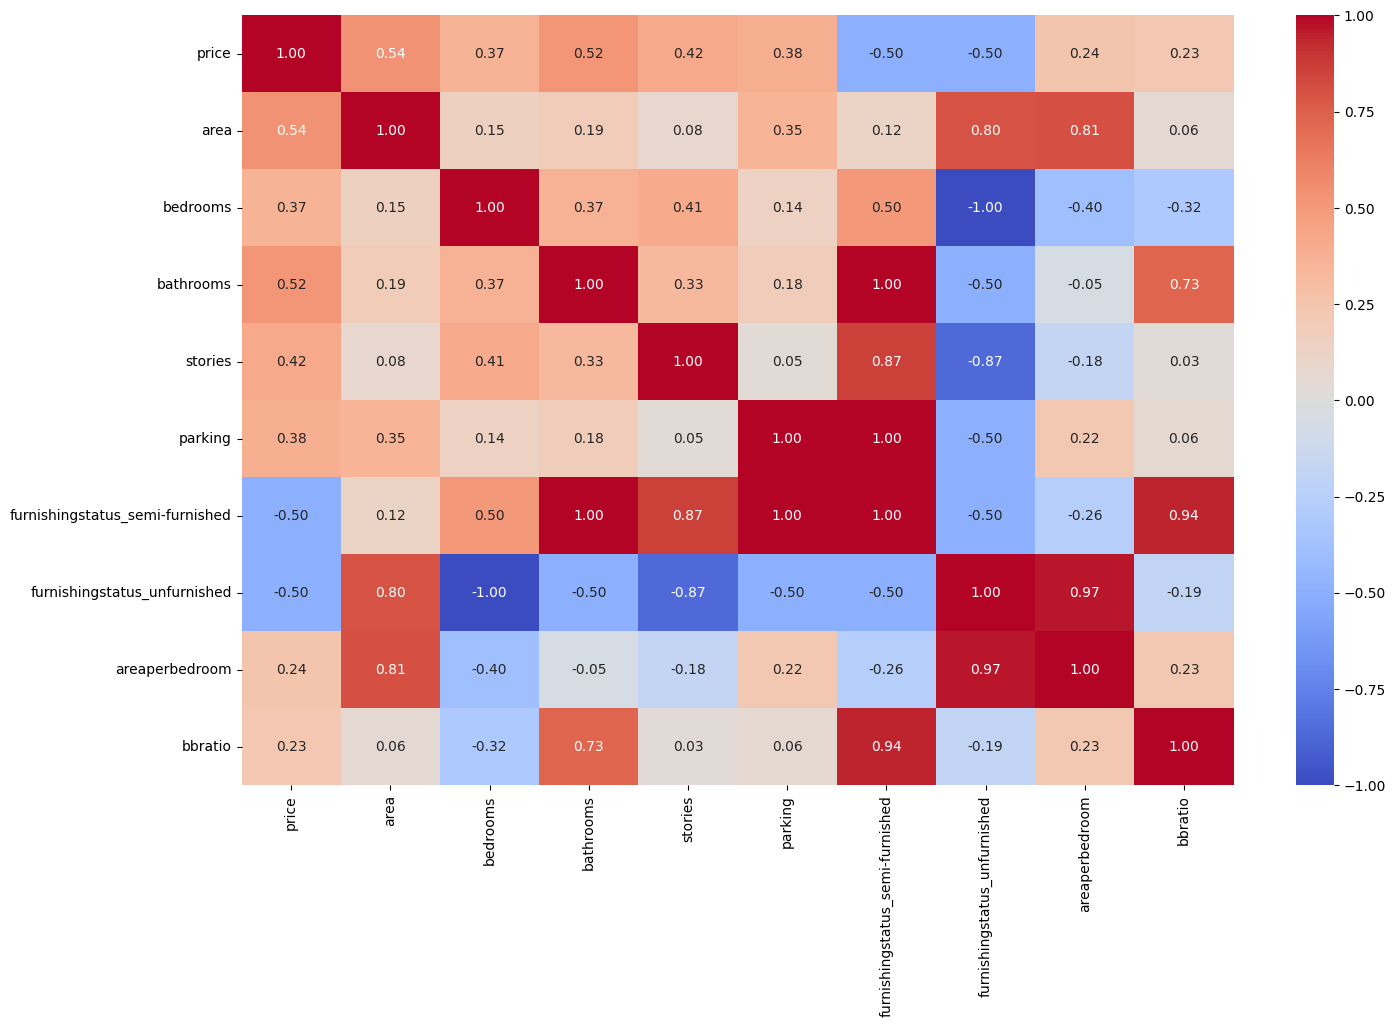

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


correlation_matrix = housing.corr()

plt.figure(figsize=(16, 10))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()



In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(input_data):
    # Create a DataFrame to store the VIF scores
    vif_data = pd.DataFrame()
    vif_data["Feature"] = input_data.columns
    vif_data["VIF"] = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]

    return vif_data

# Assuming 'input_data' is a DataFrame containing your input features
print(housing.dtypes)

# Handle missing values (e.g., replace NaN with 0)
housing = housing.fillna(0)
numeric_columns = housing.select_dtypes(include=['number'])
vif_result = vif_scores(numeric_columns)
print(vif_result)




price                              float64
area                               float64
bedrooms                           float64
bathrooms                          float64
stories                            float64
mainroad                            object
guestroom                           object
basement                            object
hotwaterheating                     object
airconditioning                     object
parking                            float64
prefarea                            object
furnishingstatus                    object
furnishingstatus_semi-furnished    float64
furnishingstatus_unfurnished       float64
areaperbedroom                     float64
bbratio                            float64
dtype: object
                           Feature        VIF
0                            price   8.432766
1                             area  57.699274
2                         bedrooms   7.480812
3                        bathrooms   9.732682
4                        

In [113]:

num_columns_to_drop = 5

# List of columns to drop based on VIF scores
columns_to_drop = ["areaperbedroom", "area", "bbratio", "bathrooms","basement","furnishingstatus"]

# Drop the identified high VIF columns from the DataFrame
housing = housing.drop(columns=columns_to_drop)


In [114]:
housing

,price,bedrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.6,0.666667,1,0,0,1,0.666667,1,0.0,0.0
1,0.909091,0.6,1.000000,1,0,0,1,1.000000,0,1.0,0.0
2,0.909091,0.4,0.333333,1,0,0,0,0.666667,1,0.0,1.0
3,0.906061,0.6,0.333333,1,0,0,1,1.000000,1,0.0,0.0
4,0.836364,0.6,0.333333,1,1,0,1,0.666667,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.2,0.000000,1,0,0,0,0.666667,0,0.0,0.0
541,0.001485,0.4,0.000000,0,0,0,0,0.000000,0,0.0,0.0
542,0.000000,0.2,0.000000,1,0,0,0,0.000000,0,0.0,0.0
543,0.000000,0.4,0.000000,0,0,0,0,0.000000,0,0.0,0.0


In [115]:
vif_result

,Feature,VIF
0,price,8.432766
1,area,57.699274
2,bedrooms,7.480812
3,bathrooms,9.732682
4,stories,2.651970
5,parking,2.044734
6,furnishingstatus_semi-furnished,1.079051
7,furnishingstatus_unfurnished,1.040782
8,areaperbedroom,67.304025
9,bbratio,24.935280


In [116]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   bedrooms                         545 non-null    float64
 2   stories                          545 non-null    float64
 3   mainroad                         545 non-null    object 
 4   guestroom                        545 non-null    object 
 5   hotwaterheating                  545 non-null    object 
 6   airconditioning                  545 non-null    object 
 7   parking                          545 non-null    float64
 8   prefarea                         545 non-null    object 
 9   furnishingstatus_semi-furnished  545 non-null    float64
 10  furnishingstatus_unfurnished     545 non-null    float64
dtypes: float64(6), object(5)
memory usage: 47.0+ KB


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing, housing['price'], test_size=0.2, random_state=100)

In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lm = LinearRegression()

# Initialize RFE with the Linear Regression model and the number of features to select (e.g., 5)
rfe = RFE(lm, n_features_to_select=5)

# Fit and run RFE with X_train and y_train
rfe.fit(X_train, y_train)

# Printing the boolean results for each feature (True if selected, False if not)
print(rfe.support_)

# Printing the ranks for each feature (lower rank indicates higher importance)
print(rfe.ranking_)

# Print the total number of features in X
print("Total number of features in X:", X_train.shape[1])

# Get the columns which are supported by RFE
selected_columns = X_train.columns[rfe.support_]
print("Selected columns:", selected_columns)



[ True False False  True False  True False  True  True False False]
[1 2 4 1 5 1 7 1 1 3 6]
Total number of features in X: 11
Selected columns: Index(['price', 'mainroad', 'hotwaterheating', 'parking', 'prefarea'], dtype='object')


<ipython-input-123-b0375a8b3841>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price'] = housing['price']


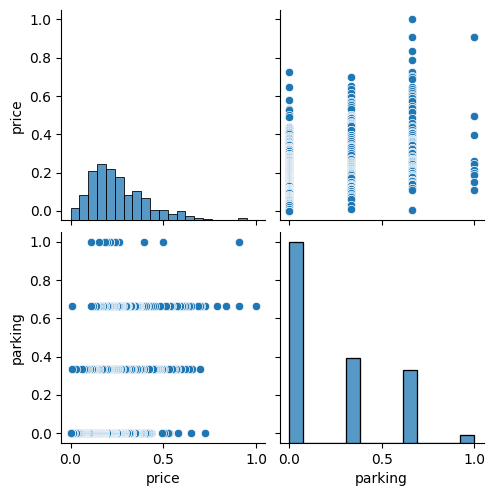

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the selected variables and 'price' in a DataFrame named 'selected_data'
selected_columns = ['price', 'mainroad', 'hotwaterheating', 'parking', 'prefarea']
selected_data = housing[selected_columns]

# Add the 'price' column to the selected data
selected_data['price'] = housing['price']

# Create a pair plot
sns.pairplot(selected_data, kind='scatter')
plt.show()


In [141]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Assuming you have the selected columns from RFE in 'selected_columns'

selected_columns = ['price', 'mainroad', 'hotwaterheating', 'parking', 'prefarea']

# Create the X_test_rfe DataFrame with the selected columns
X_test_rfe = X_test[selected_columns]

# Add a constant variable (intercept) to X_test_rfe
X_test_rfe = sm.add_constant(X_test_rfe)

# Make predictions using the third linear model (lm_3)
lm.fit(X_train_rfe, y_train)
y_pred = lm.predict(X_test_rfe)
print(y_pred)




[0.22969697 0.48484848 0.3030303  0.24242424 0.22787879 0.25454545
 0.58787879 0.3030303  0.08484848 0.36363636 0.16666667 0.42424242
 0.05454545 0.3630303  0.33333333 0.27878788 0.90606061 0.22424242
 0.53030303 0.36363636 0.12060606 0.19393939 0.23575758 0.0969697
 0.14848485 0.07818182 0.23636364 0.38484848 0.18787879 0.63636364
 0.07878788 0.15151515 0.13939394 0.01212121 0.26666667 0.21212121
 0.21212121 0.09090909 0.16666667 0.19545455 0.28484848 0.32727273
 0.33333333 0.03030303 0.07878788 0.25454545 0.21212121 0.07272727
 0.16060606 0.37575758 0.07393939 0.34545455 0.3030303  0.57575758
 0.38484848 0.27272727 0.39393939 0.14484848 0.11818182 0.27272727
 0.01212121 0.15757576 0.57575758 0.39333333 0.01818182 0.15151515
 0.48424242 0.15757576 0.12121212 0.33030303 0.06060606 0.24181818
 0.27333333 0.06363636 0.27272727 0.37727273 0.33333333 0.53939394
 0.72727273 0.24848485 0.47272727 0.04242424 0.10909091 0.1030303
 0.28787879 0.07878788 0.12727273 0.49090909 0.27212121 0.109090

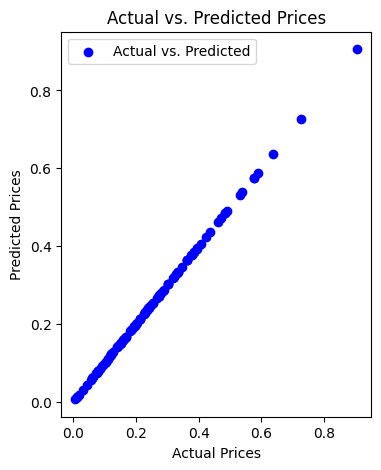

In [143]:
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are your actual and predicted values
# Create a scatter plot to visualize the spread
plt.figure(figsize=(4, 5))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()


In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'y_test' and 'y_pred' are your actual and predicted values
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Print the scores
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)


RMSE: 8.21617649780584e-17
MSE: 6.750555624309704e-33
MAE: 6.676298148369455e-17
